In [1]:
# Video that I used to build this code:
# https://www.youtube.com/watch?v=c0k-YLQGKjY

import tensorflow as tf
import os
import pandas as pd
import numpy as np


In [2]:
# zip_path = tf.keras.utils.get_file(
#     origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
#     fname='jena_climate_2009_2016.csv.zip',
#     extract=True)
# csv_path, _ = os.path.splitext(zip_path)
# #csv_path

In [3]:
# Here we have data each 10 minutes
df = pd.read_csv("Dados_PV_15_min_1ano_timestamp.csv")
#df

df = df[5::6]
df

In [4]:
# Now we want datas each an hour
# df = df[5::6]
#df

In [5]:
df.index = pd.to_datetime(df['timestamp']) # , format='%Y.%m.%d %H:%M:%S')
#df[:5]
df.shape

(35136, 2)

<AxesSubplot:xlabel='timestamp'>

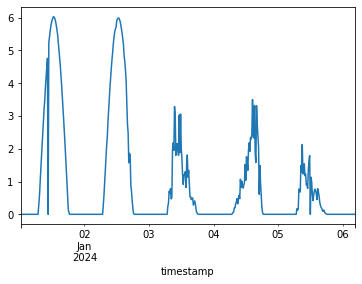

In [6]:
power = df['potencia_PV']
power[1:500].plot()

Vamos entrar com 5 dados e prever o sexto

In [7]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [8]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(power, WINDOW_SIZE)
print(X1.shape)
print(y1.shape)

(35131, 5, 1)
(35131,)


In [9]:
X_train1, y_train1 = X1[:25000], y1[:25000]
X_val1, y_val1 = X1[25000:30000], y1[25000:30000]
X_test1, y_test1 = X1[30000:], y1[30000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((25000, 5, 1), (25000,), (5000, 5, 1), (5000,), (5131, 5, 1), (5131,))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((WINDOW_SIZE, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [11]:
cp1 = ModelCheckpoint('PV_model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Rodar treinamento
X_train e y_train servirá de treino
Será validado com X_val1 e y_val1
X_test1 e y_test1 não são conhecidos pelo modelo. Servirá para treinarmos


In [12]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
777/782 [============================>.] - ETA: 0s - loss: 2.9535 - root_mean_squared_error: 1.7186

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 14s 14ms/step - loss: 2.9409 - root_mean_squared_error: 1.7149 - val_loss: 0.4094 - val_root_mean_squared_error: 0.6398
Epoch 2/10
774/782 [============================>.] - ETA: 0s - loss: 0.7516 - root_mean_squared_error: 0.8669

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 10s 12ms/step - loss: 0.7514 - root_mean_squared_error: 0.8668 - val_loss: 0.2809 - val_root_mean_squared_error: 0.5300
Epoch 3/10
779/782 [============================>.] - ETA: 0s - loss: 0.6198 - root_mean_squared_error: 0.7873

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 9s 12ms/step - loss: 0.6197 - root_mean_squared_error: 0.7872 - val_loss: 0.2652 - val_root_mean_squared_error: 0.5150
Epoch 4/10
782/782 [==============================] - 4s 5ms/step - loss: 0.5955 - root_mean_squared_error: 0.7717 - val_loss: 0.2763 - val_root_mean_squared_error: 0.5256
Epoch 5/10
778/782 [============================>.] - ETA: 0s - loss: 0.5817 - root_mean_squared_error: 0.7627

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 11s 14ms/step - loss: 0.5821 - root_mean_squared_error: 0.7630 - val_loss: 0.2427 - val_root_mean_squared_error: 0.4927
Epoch 6/10
782/782 [==============================] - 4s 6ms/step - loss: 0.5700 - root_mean_squared_error: 0.7550 - val_loss: 0.2433 - val_root_mean_squared_error: 0.4932
Epoch 7/10
780/782 [============================>.] - ETA: 0s - loss: 0.5644 - root_mean_squared_error: 0.7513

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 11s 14ms/step - loss: 0.5653 - root_mean_squared_error: 0.7518 - val_loss: 0.2353 - val_root_mean_squared_error: 0.4851
Epoch 8/10
775/782 [============================>.] - ETA: 0s - loss: 0.5595 - root_mean_squared_error: 0.7480

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 10s 13ms/step - loss: 0.5594 - root_mean_squared_error: 0.7479 - val_loss: 0.2316 - val_root_mean_squared_error: 0.4813
Epoch 9/10
780/782 [============================>.] - ETA: 0s - loss: 0.5583 - root_mean_squared_error: 0.7472

INFO:tensorflow:Assets written to: PV_model1\assets


INFO:tensorflow:Assets written to: PV_model1\assets


782/782 [==============================] - 10s 13ms/step - loss: 0.5576 - root_mean_squared_error: 0.7467 - val_loss: 0.2313 - val_root_mean_squared_error: 0.4810
Epoch 10/10
782/782 [==============================] - 4s 6ms/step - loss: 0.5550 - root_mean_squared_error: 0.7450 - val_loss: 0.2364 - val_root_mean_squared_error: 0.4862


Importar modelo

In [13]:
from tensorflow.keras.models import load_model
model1 = load_model('PV_model1/')

Testar

In [14]:
train_predictions = model1.predict(X_test1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_test1})
train_results

161/161 [==============================] - 1s 3ms/step


,Train Predictions,Actuals
0,4.629189,4.69
1,4.586909,4.60
2,4.511299,4.51
3,4.424047,4.38
4,4.305465,4.21
...,...,...
5126,0.043023,0.00
5127,0.043023,0.00
5128,0.043023,0.00
5129,0.043023,0.00


Imprimir resultados

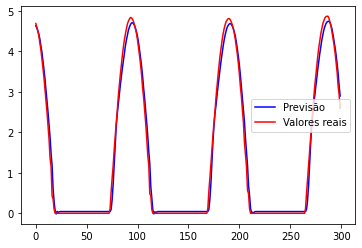

In [15]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][0:300], color = 'blue', label = 'Previsão')
plt.plot(train_results['Actuals'][0:300], color = 'red', label = 'Valores reais')
plt.legend()  # Adiciona a legenda ao gráfico
plt.show()